# Analyzing wildfire activities in Australia

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

---


# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


---


### Importing Data


In [2]:
import requests
import io
import pandas as pd
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv'
resp = requests.get(URL)
text = io.StringIO(resp.text)

df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Some row samples from the uploaded dataset:

In [3]:
df

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R
...,...,...,...,...,...,...,...,...,...,...
26401,WA,10/27/2020,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N
26402,WA,10/28/2020,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N
26403,WA,10/29/2020,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N
26404,WA,10/30/2020,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N


---


Checking column names and data type for each variable

In [4]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [5]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Convert the 'date' type to the 'date and time' type and extract the 'year' and 'month' from the date and insert into the dataframe as separate columns the' dateTime 'type and extract the 'year' and 'month' from the date and insert into the dataframe as separate columns


In [6]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26401,WA,10/27/2020,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N,2020,10
26402,WA,10/28/2020,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N,2020,10
26403,WA,10/29/2020,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N,2020,10
26404,WA,10/30/2020,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,2020,10


**Verify the columns again**


In [7]:
#verify the columns again
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

---


### understand the change in average estimated fire area over time <br>

In [8]:
df_1 = df[['Year', 'Region', 'Estimated_fire_area']]
df_2 = df_1.groupby(['Year', 'Region'], as_index= False).sum()
df_3 = df_2.pivot(index= 'Year', columns= 'Region')
df_3['Total'] = df_3.sum(axis=1)
df_3

Estimated_fire_area                                              \
Region                 NSW             NT             QL            SA   
Year                                                                     
2005           8085.952670   43830.281000   50338.852245   3561.475792   
2006          14492.717467   96103.001763   55141.928689   2996.562723   
2007           5161.304517  116688.992773   36237.279357   3217.659328   
2008           2983.826879   48063.387753   41063.513149    797.275370   
2009           6774.373623   72423.476179   78448.167324    771.847480   
2010           2622.511660   34031.850925   18043.763615   1465.332498   
2011          11707.049996  235211.083318  100617.067372  12803.442246   
2012           7627.129718  138963.251423  107536.938971  18288.064712   
2013          10688.360500   42091.502117   44798.682211   4533.236499   
2014           7776.121207   88598.658968   42891.377422   6183.233193   
2015           7192.775038   99896.510910   28934.583261   1810.381321   
2016           9722.724764   37241.680783   35650.588442   1095.949829   
2017          12897.324329   91230.903190   32556.830406   3749.383316   
2018          11290.609889   81560.516886   50356.907314   5225.057583   
2019          75486.277478   61596.653549   43346.939744   5938.680850   
2020          17090.387557   20627.908867   16783.741154   2227.112433   

                                                          Total  
Region           TA            VI             WA                 
Year                                                             
2005    1253.126522   3676.603096   50952.691529  161698.982854  
2006    2397.496679  16999.173640  110327.131442  298458.012405  
2007    2358.057223   7154.857721   83654.764491  254472.915410  
2008    1572.640395   2391.874476   57354.845856  154227.363879  
2009     795.347996   6295.455746   61374.510318  226883.178666  
2010     830.053277   3395.373366   30821.297948   91210.183288  
2011     398.345274   5929.575832   77782.166575  444448.730613  
2012     786.502301   3419.124912  202919.297904  479540.309942  
2013    1971.663223   5398.696697   56034.513074  165516.654320  
2014     624.311305   7753.802553   85944.730039  239772.234688  
2015     558.916659   3707.947088   74343.553868  216444.668144  
2016    2099.485369   2167.747549   42978.574330  130956.751067  
2017     676.865302   3629.929006  122121.468944  266862.704493  
2018     620.194928   4050.259169  135310.611981  288414.157749  
2019    3841.230820  12371.389673   95826.912574  298408.084688  
2020     720.295606  11853.078667   23714.646373   93017.170657

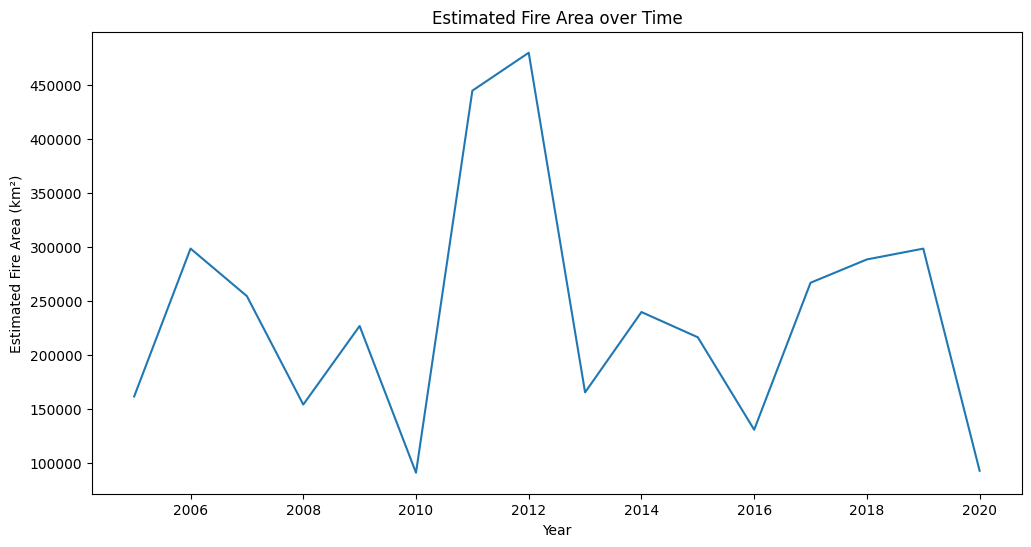

In [9]:
plt.figure(figsize=(12, 6))
df_3['Total'].plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

### The climax in the plot exists between 2010 to 2013. The result should be narrowed down by plotting the estimated fire area for the year grouped together with the month.


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

df['year_month'] = df['Date'].dt.strftime('%Y-%m')
df

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month,year_month
0,NSW,2005-01-04,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1,2005-01
1,NSW,2005-01-05,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1,2005-01
2,NSW,2005-01-06,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1,2005-01
3,NSW,2005-01-07,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1,2005-01
4,NSW,2005-01-08,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1,2005-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26401,WA,2020-10-27,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N,2020,10,2020-10
26402,WA,2020-10-28,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N,2020,10,2020-10
26403,WA,2020-10-29,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N,2020,10,2020-10
26404,WA,2020-10-30,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,2020,10,2020-10


In [11]:
df_a = df[['year_month', 'Region', 'Estimated_fire_area']]
df_b = df_a.groupby(['year_month', 'Region'], as_index= False).sum()
df_c = df_b.pivot(index= 'year_month', columns= 'Region')
df_c['Total'] = df_c.sum(axis=1)
df_c

Estimated_fire_area                                        \
Region                     NSW           NT           QL          SA   
year_month                                                             
2005-01             386.017667   650.851828  2465.098908  854.650142   
2005-02             433.127083   571.480710  3000.816463   30.207500   
2005-03            1478.121667   422.996290  1741.816959  407.610336   
2005-04            1923.874491  2957.283570  1344.648850  630.692419   
2005-05            1604.296428  8172.433407  1162.092066  554.334533   
...                        ...          ...          ...         ...   
2020-06             144.546483  4223.401607   959.596668    2.640000   
2020-07              71.211083  5593.559885  2000.245553    6.940000   
2020-08             114.336782  1607.989786  1139.172938   22.036000   
2020-09             157.735314  2336.181280  2188.694971    7.530000   
2020-10             125.460333  1705.741185  5380.462345   13.890000   

                                                         Total  
Region              TA           VI           WA                
year_month                                                      
2005-01      49.735536   219.937314  6037.314778  10663.606173  
2005-02       1.000000    69.340000  7511.184150  11617.155907  
2005-03     274.123667  1194.147135  1516.255023   7035.071077  
2005-04     510.050661  1462.493502  3853.842572  12682.886067  
2005-05     217.065889   432.553163  4841.272555  16984.048041  
...                ...          ...          ...           ...  
2020-06       2.640000    55.109333  1194.207873   6582.141964  
2020-07       1.680000     5.100000  1361.967043   9040.703564  
2020-08       4.000000     8.960000   352.704155   3249.199661  
2020-09      17.380000    12.440000  1177.197809   5897.159373  
2020-10       8.580000    11.840000  1937.137537   9183.111401  

[190 rows x 8 columns]

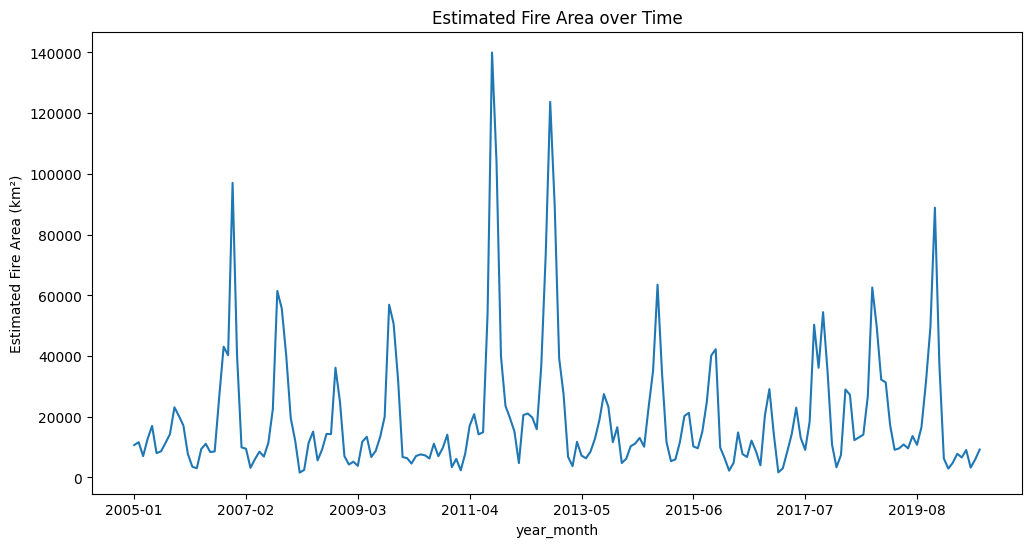

In [12]:
plt.figure(figsize=(12, 6))
df_c['Total'].plot(kind='line')
plt.xlabel('year_month')
plt.ylabel('Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012, this was the time of maximum wildfire hit in Austrailia.


---


### the distribution of mean estimated fire brightness across the regions.<br>

the regions mentioned in the dataset


In [13]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

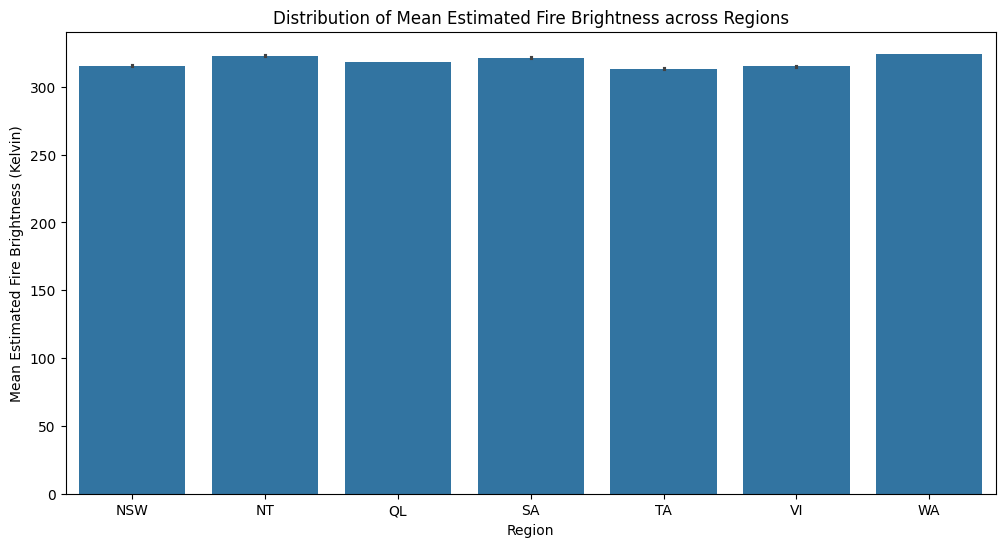

In [14]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Region', y='Mean_estimated_fire_brightness', data=df)
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

---


### the portion of count of pixels for presumed vegetation fires vary across regions.


In [15]:
df_e = df[['Region', 'Year', 'Estimated_fire_area']]
df_g = df_e.groupby(['Region', 'Year'], as_index= False).sum()
df_h = df_g.pivot(index= 'Region', columns= 'Year')
df_h['Total'] = df_h.sum(axis=1)
df_h

Estimated_fire_area                                              \
Year                  2005           2006           2007          2008   
Region                                                                   
NSW            8085.952670   14492.717467    5161.304517   2983.826879   
NT            43830.281000   96103.001763  116688.992773  48063.387753   
QL            50338.852245   55141.928689   36237.279357  41063.513149   
SA             3561.475792    2996.562723    3217.659328    797.275370   
TA             1253.126522    2397.496679    2358.057223   1572.640395   
VI             3676.603096   16999.173640    7154.857721   2391.874476   
WA            50952.691529  110327.131442   83654.764491  57354.845856   

                                                                  \
Year            2009          2010           2011           2012   
Region                                                             
NSW      6774.373623   2622.511660   11707.049996    7627.129718   
NT      72423.476179  34031.850925  235211.083318  138963.251423   
QL      78448.167324  18043.763615  100617.067372  107536.938971   
SA        771.847480   1465.332498   12803.442246   18288.064712   
TA        795.347996    830.053277     398.345274     786.502301   
VI       6295.455746   3395.373366    5929.575832    3419.124912   
WA      61374.510318  30821.297948   77782.166575  202919.297904   

                                                                               \
Year            2013          2014          2015          2016           2017   
Region                                                                          
NSW     10688.360500   7776.121207   7192.775038   9722.724764   12897.324329   
NT      42091.502117  88598.658968  99896.510910  37241.680783   91230.903190   
QL      44798.682211  42891.377422  28934.583261  35650.588442   32556.830406   
SA       4533.236499   6183.233193   1810.381321   1095.949829    3749.383316   
TA       1971.663223    624.311305    558.916659   2099.485369     676.865302   
VI       5398.696697   7753.802553   3707.947088   2167.747549    3629.929006   
WA      56034.513074  85944.730039  74343.553868  42978.574330  122121.468944   

                                                          Total  
Year             2018          2019          2020                
Region                                                           
NSW      11290.609889  75486.277478  17090.387557  2.115994e+05  
NT       81560.516886  61596.653549  20627.908867  1.308160e+06  
QL       50356.907314  43346.939744  16783.741154  7.827472e+05  
SA        5225.057583   5938.680850   2227.112433  7.466470e+04  
TA         620.194928   3841.230820    720.295606  2.150453e+04  
VI        4050.259169  12371.389673  11853.078667  1.001949e+05  
WA      135310.611981  95826.912574  23714.646373  1.311462e+06

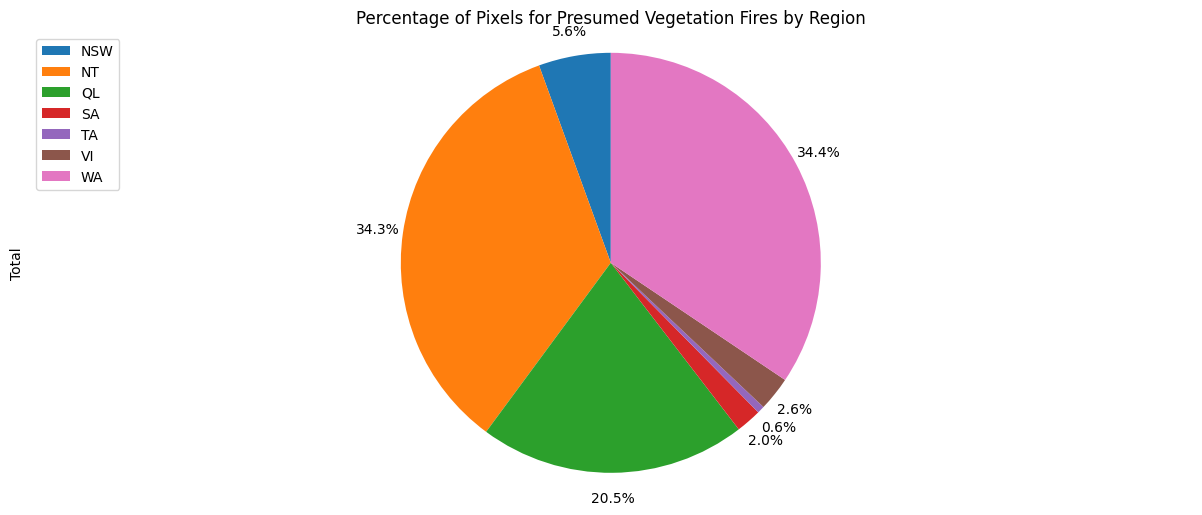

In [16]:
df_h['Total'].plot(kind='pie', figsize=(15,6), autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.12)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.legend(labels=df_h.index, loc='upper left')
plt.show()

---


### histogram of the mean estimated fire brightness.

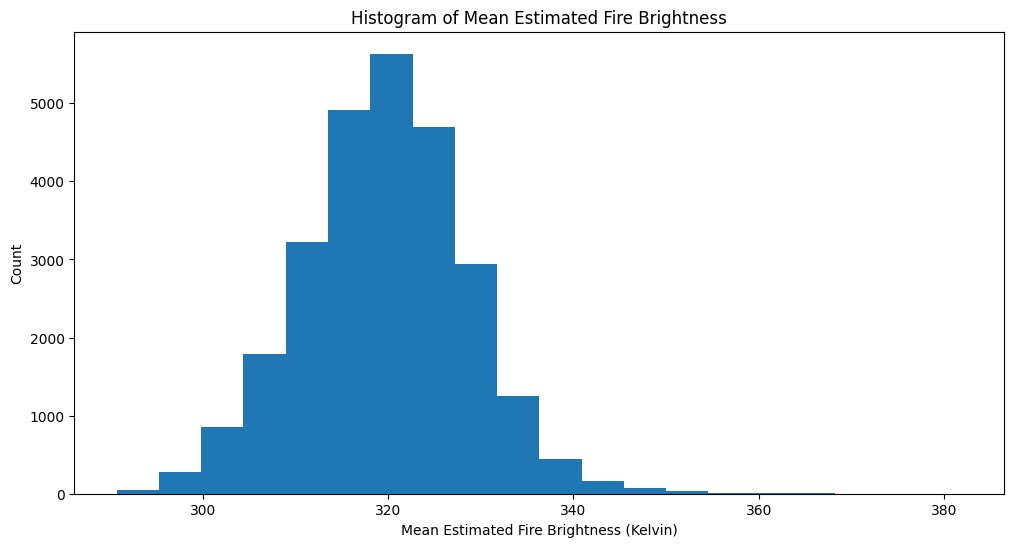

In [17]:
plt.figure(figsize=(12, 6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

### understand the distribution of estimated fire brightness across regions.


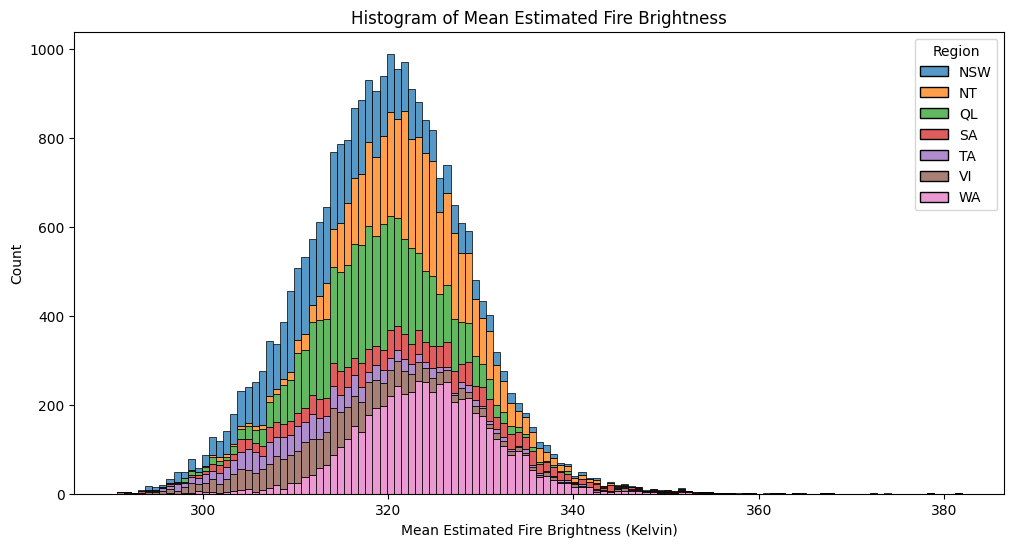

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df['Mean_estimated_fire_brightness'], hue='Region', multiple='stack')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

---


### Discovery if there is any correlation between mean estimated fire radiative power and mean confidence level?


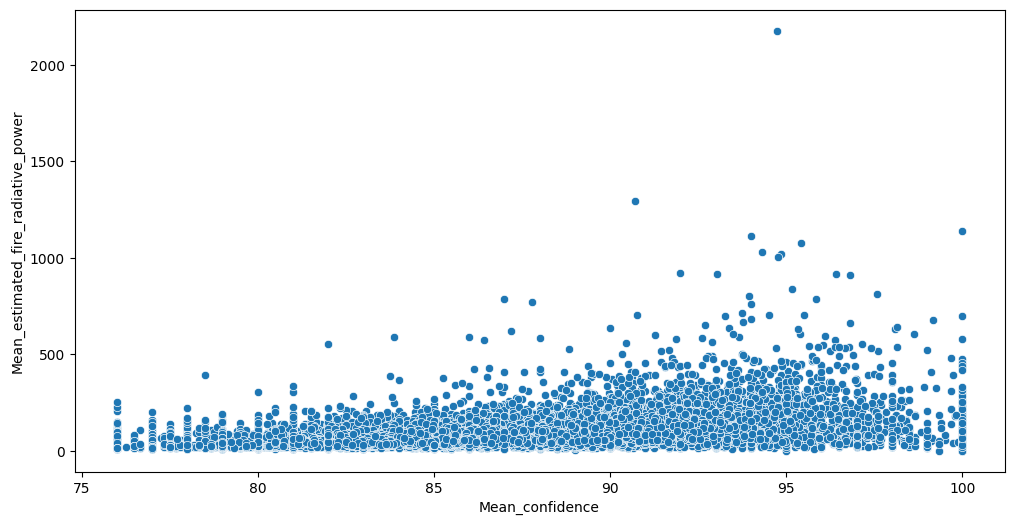

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.show()

---


### The location of the seven regions on the map of Australia.

In [21]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411],
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [22]:
from folium import plugins

# instantiate a feature group
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)

---
